Theta0: [4.73899982]
Theta1: 1.0751408892283836


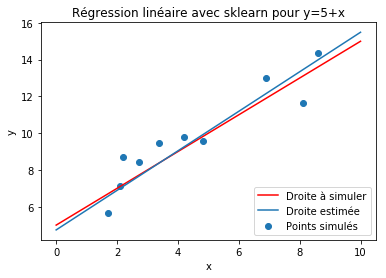

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,m) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

# Régression linéaire avec sklearn par l'algorithme du gradiant
from sklearn.linear_model import SGDRegressor
modele = SGDRegressor()
modele.fit(X[:, np.newaxis],Y) # Le paramètre X doit passer de 1D à 2D
Y_estime = modele.predict(X_modele[:, np.newaxis])
print("Theta0:", modele.intercept_)
print("Theta1:", modele.coef_[0])
plt.plot(X_modele,Y_estime,label='Droite estimée')

plt.title('Régression linéaire avec sklearn pour y=5+x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()